In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)

# Understanding the Dataset

The Airbnb Data was obtained from a Kaggle Dataset at the following address
https://www.kaggle.com/navaneesh/airbnb#train.csv


The data provided is in the form of CSV files and are listed below: 

i.	train.csv: The training set of users 

ii.	test.csv: The test set of users. 

We are going to understand the Train dataset the Test is going to be used to test the algorithm for prediction later



In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [21]:
train.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [22]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [51]:
train.drop('thumbnail_url',axis = 1,inplace=True)
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
train.shape

(74111, 29)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 28 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

    Now we calculate the percentage of missing values of various columns

In [52]:
na_train = (train.isnull().sum() / len(train)) * 100
na_train = na_train.drop(na_train[na_train == 0].index)
na_train = na_train.sort_values(ascending=False)
na_train = pd.DataFrame({'NAN Values percent' :na_train})
na_train


,NAN Values percent
host_response_rate,24.691341
review_scores_rating,22.563452
first_review,21.405729
last_review,21.355804
neighbourhood,9.272578
zipcode,1.303450
bathrooms,0.269865
host_since,0.253674
host_identity_verified,0.253674
host_has_profile_pic,0.253674


In [53]:
%matplotlib inline
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_plot = train.select_dtypes(include=numerics)

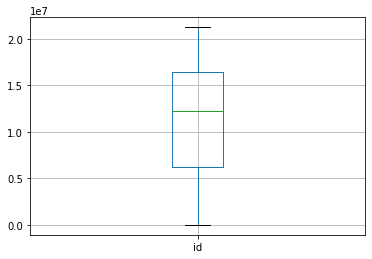

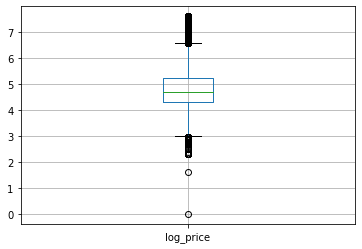

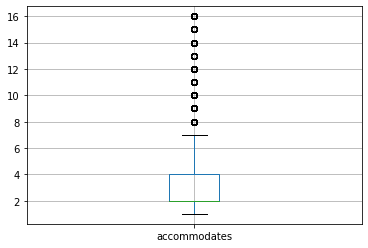

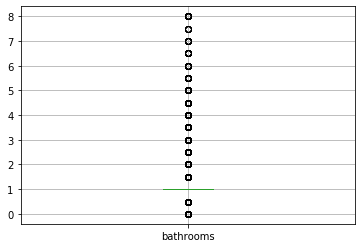

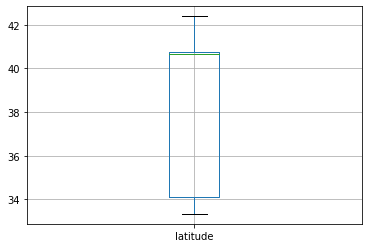

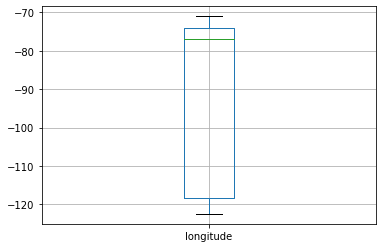

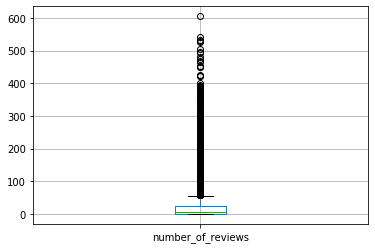

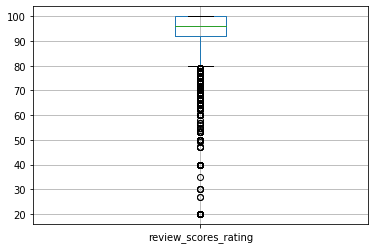

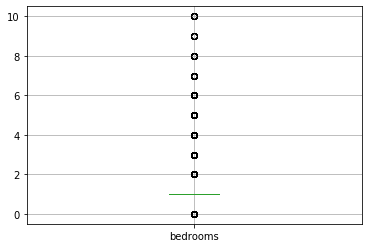

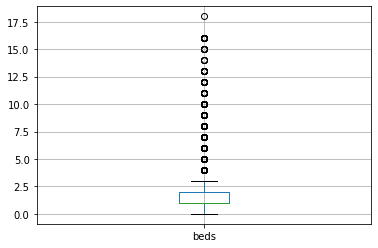

In [54]:
for column in train_plot:
    plt.figure()
    train_plot.boxplot([column])

In [56]:
Q1 = train_plot.quantile(0.25)
Q3 = train_plot.quantile(0.75)
IQR = Q3 - Q1
outliers = (train_plot < (Q1 - 1.5 * IQR)) |(train_plot > (Q3 + 1.5 * IQR))
outliers

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
74106,False,False,False,False,False,False,False,False,False,False
74107,False,False,False,True,False,False,False,False,True,True
74108,False,False,False,False,False,False,False,False,True,False
74109,False,False,False,False,False,False,False,False,True,False


In [57]:
train_wooutlier = train_plot[~((train_plot < (Q1 - 1.5 * IQR)) |(train_plot > (Q3 + 1.5 * IQR))).any(axis=1)]
train_wooutlier

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,40.696524,-73.991617,2,100.0,1.0,1.0
2,7919400,4.976734,5,1.0,40.808110,-73.943756,10,92.0,1.0,3.0
5,12422935,4.442651,2,1.0,37.753164,-122.429526,3,100.0,1.0,1.0
6,11825529,4.418841,3,1.0,33.980454,-118.462821,15,97.0,1.0,1.0
7,13971273,4.787492,2,1.0,34.046737,-118.260439,9,93.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
74101,18077717,4.584967,1,1.0,34.020021,-118.498239,4,90.0,1.0,1.0
74103,11829011,5.135798,2,1.0,37.789989,-122.407384,24,98.0,1.0,1.0
74104,14934112,4.356709,2,1.0,41.909067,-87.623046,6,100.0,1.0,1.0
74105,808802,4.248495,2,1.0,34.092640,-118.343921,36,91.0,1.0,1.0


In [44]:
train['host_has_profile_pic'] = train['host_has_profile_pic'].replace("t", 1) 
train['host_has_profile_pic'] = train['host_has_profile_pic'].replace("f", 0) 

train['host_identity_verified'] = train['host_identity_verified'].replace("t", 1) 
train['host_identity_verified'] = train['host_identity_verified'].replace("f", 0) 

train['instant_bookable'] = train['instant_bookable'].replace("t", 1) 
train['instant_bookable'] = train['instant_bookable'].replace("f", 0)

train['cleaning_fee'] = train['cleaning_fee'].astype(int)

train['host_response_rate'] = train['host_response_rate'].str.replace("%","") 

train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,1,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,NaN,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,1,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,100,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,1,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,100,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,1,SF,This light-filled home-away-from-home is super...,NaN,1.0,1.0,NaN,2015-04-19,0,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,1.0,100,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [47]:
%matplotlib inline
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_plot = train.select_dtypes(include=numerics)


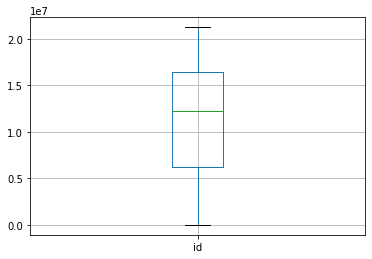

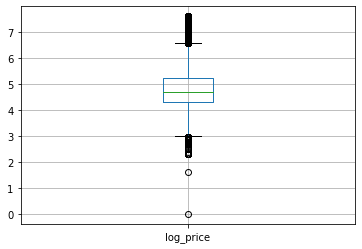

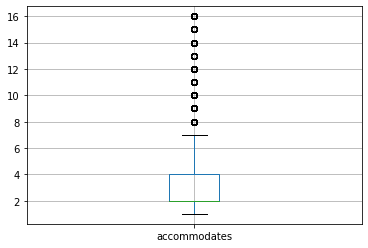

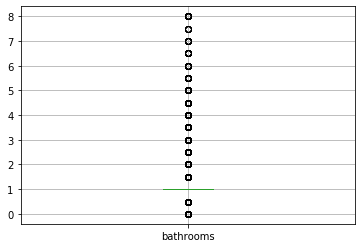

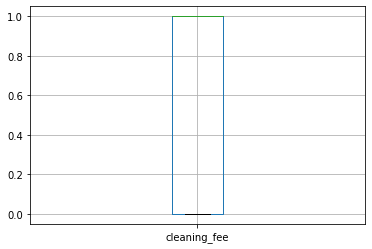

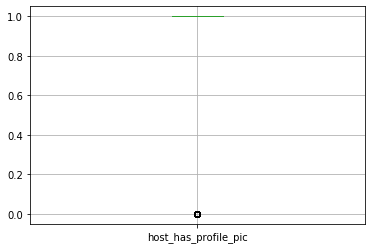

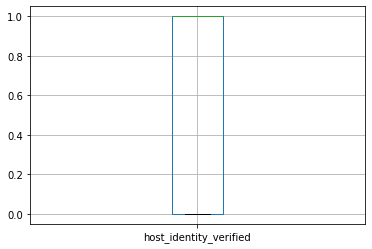

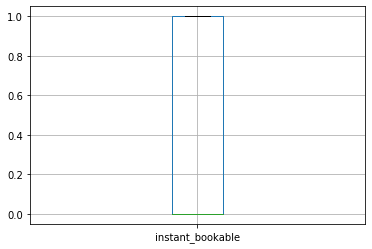

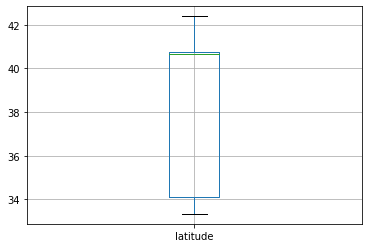

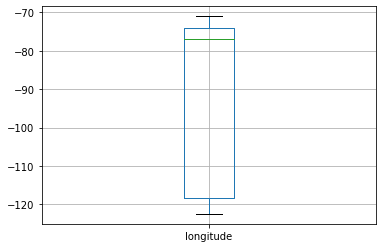

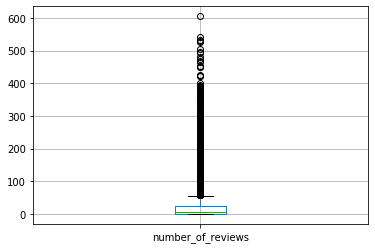

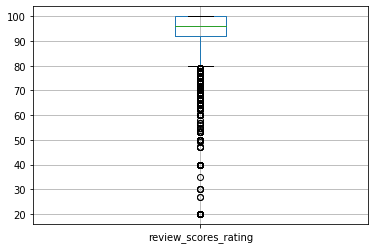

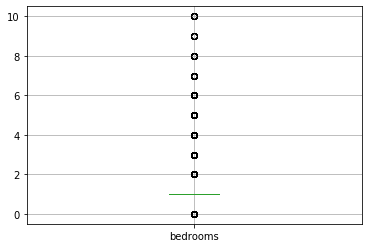

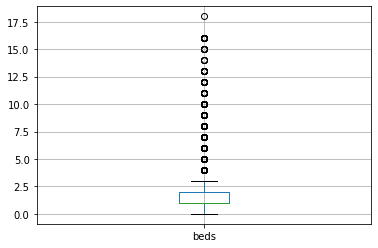

In [46]:
for column in train_plot:
    plt.figure()
    train_plot.boxplot([column])

In [35]:
categorical = ['property_type','room_type','bed_type','cancellation_policy','city']
train = pd.get_dummies(train,columns = categorical)
train.head()

,id,log_price,amenities,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,0,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,100,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,100,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,This light-filled home-away-from-home is super...,0,1.0,1.0,0,2015-04-19,0,0,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,94117.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,1.0,100,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [32]:
train.fillna(0,inplace=True)
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,1,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,0,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,1,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,100,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,1,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,100,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,1,SF,This light-filled home-away-from-home is super...,0,1.0,1.0,0,2015-04-19,0,0,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,1.0,100,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 77 columns):
id                                     74111 non-null int64
log_price                              74111 non-null float64
amenities                              74111 non-null object
accommodates                           74111 non-null int64
bathrooms                              74111 non-null float64
cleaning_fee                           74111 non-null int32
description                            74111 non-null object
first_review                           74111 non-null object
host_has_profile_pic                   74111 non-null float64
host_identity_verified                 74111 non-null float64
host_response_rate                     74111 non-null object
host_since                             74111 non-null object
instant_bookable                       74111 non-null int64
last_review                            74111 non-null object
latitude                             